In [1]:
import torch
from data_transforms import Log10, Clamp, AugmentTranslate, WhitenInput
import ground_based_dataset as gbd
from torch.utils.data.dataloader import DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt

In [48]:
path = '/home/mingx/datasets/'
n_data = 1024
augment_translation = 2
batch_size = 128
has_cuda = torch.cuda.is_available()
#train_composed = transforms.Compose(
 #   [Clamp(1e-9, 100), WhitenInput(),
  #   AugmentTranslate(augment_translation, 101)])
train_composed = transforms.Compose([])
ground_train_dataset = gbd.GroundBasedDataset(
    path, length=n_data, transform=train_composed)
ground_train_loader = DataLoader(
    ground_train_dataset, batch_size=batch_size,
    shuffle=False, pin_memory=not has_cuda)

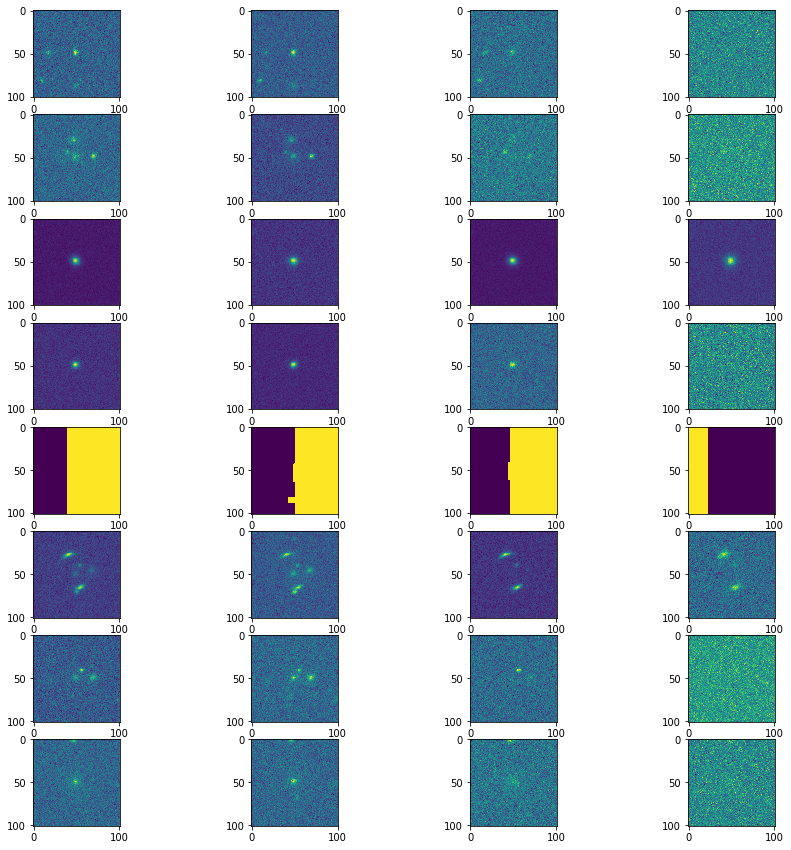

In [49]:
plt.rcParams['figure.figsize'] = [15, 15]
for i, data_batched in enumerate(ground_train_loader, 0):
    images, is_lens, mask, indices = \
        data_batched['image'], data_batched['is_lens'], \
        data_batched['mask'], data_batched['index']
    k = 1
    img = images[k].to('cpu')
    ax = plt.subplot(8, 4, i * 4 + 1)
    plt.imshow(img[0,:,:])
    ax = plt.subplot(8, 4, i * 4 + 2)
    plt.imshow(img[1,:,:])
    ax = plt.subplot(8, 4, i * 4 + 3)
    plt.imshow(img[2,:,:])
    ax = plt.subplot(8, 4, i * 4 + 4)
    plt.imshow(img[3,:,:])